In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import seaborn as sns
import numpy as np
import pickle

%matplotlib inline

In [17]:
col_names = ['STEP','LAPV','TENG','LAPM', 'S3', 'prevF','nextF','MV_STEP','ratio','trend','IMG_PATH','due']
# load dataset
#album = pd.read_csv("album/album.csv", header=0, names=col_names)
album = pd.read_csv("testAlbum/album.csv", header=0, names=col_names)

album.head(20)

STEP        LAPV         TENG      LAPM       S3       prevF       nextF  \
0      1  2252.88580  24845.61792  13.99841  0.71727  2252.88580  2131.53348   
1      2  2131.53348  24937.72327  13.24121  0.69281  2252.88580  1985.39684   
2      3  1985.39684  23449.63538  12.88525  0.69239  2131.53348  1995.20821   
3      4  1995.20821  23100.47229  12.86951  0.70172  1985.39684  2035.00202   
4      5  2035.00202  22095.75281  13.15149  0.72515  1995.20821  2176.37841   
5      6  2176.37841  23439.95605  13.89636  0.72055  2035.00202  2186.86761   
6      7  2186.86761  23573.85620  13.90564  0.72152  2176.37841  2169.19032   
7      8  2169.19032  22805.80542  13.97925  0.72418  2186.86761  2219.82542   
8      9  2219.82542  23368.64502  14.08130  0.72131  2169.19032  2217.25507   
9     10  2217.25507  23549.27991  14.02344  0.72277  2219.82542  2186.98450   
10    11  2186.98450  23563.34192  13.85938  0.71181  2217.25507  2140.07937   
11    12  2140.07937  23091.40344  13.61060  0.72213  2186.98450  2097.24754   
12    13  2097.24754  22872.34216  12.85168  0.69288  2140.07937  1991.06466   
13    14  1991.06466  23056.72754  11.90259  0.67340  2097.24754  1764.90156   
14    15  1764.90156  22566.60535  10.91064  0.66060  1991.06466  1529.08383   
15    16  1529.08383  21827.73694  10.22119  0.63250  1764.90156  1324.14685   
16    17  1324.14685  20979.23755   9.60059  0.59896  1529.08383  1114.91382   
17    18  1114.91382  19894.90613   9.00305  0.57895  1324.14685   937.71692   
18    19   937.71692  19241.28479   8.23718  0.52926  1114.91382   791.41037   
19    20   791.41037  18561.72510   7.48743  0.48372   937.71692   671.03468   

    MV_STEP     ratio trend                                       IMG_PATH  \
0         0  0.000000    up  /home/pi/arducam/testAlbum/IMG_1592128298.png   
1        -1  0.946135  down  /home/pi/arducam/testAlbum/IMG_1592128300.png   
2        -2  0.931441  down  /home/pi/arducam/testAlbum/IMG_1592128303.png   
3        -3  1.004942    up  /home/pi/arducam/testAlbum/IMG_1592128305.png   
4        -4  1.019945    up  /home/pi/arducam/testAlbum/IMG_1592128307.png   
5        -5  1.069472    up  /home/pi/arducam/testAlbum/IMG_1592128310.png   
6        -6  1.004820    up  /home/pi/arducam/testAlbum/IMG_1592128312.png   
7        -7  0.991917  down  /home/pi/arducam/testAlbum/IMG_1592128315.png   
8        -8  1.023343    up  /home/pi/arducam/testAlbum/IMG_1592128317.png   
9        -9  0.998842  down  /home/pi/arducam/testAlbum/IMG_1592128320.png   
10      -10  0.986348  down  /home/pi/arducam/testAlbum/IMG_1592128322.png   
11      -11  0.978553  down  /home/pi/arducam/testAlbum/IMG_1592128324.png   
12      -12  0.979986  down  /home/pi/arducam/testAlbum/IMG_1592128327.png   
13      -13  0.949370  down  /home/pi/arducam/testAlbum/IMG_1592128329.png   
14      -14  0.886411  down  /home/pi/arducam/testAlbum/IMG_1592128332.png   
15      -15  0.866385  down  /home/pi/arducam/testAlbum/IMG_1592128334.png   
16      -16  0.865974  down  /home/pi/arducam/testAlbum/IMG_1592128336.png   
17      -17  0.841987  down  /home/pi/arducam/testAlbum/IMG_1592128339.png   
18      -18  0.841067  down  /home/pi/arducam/testAlbum/IMG_1592128341.png   
19      -19  0.843976  down  /home/pi/arducam/testAlbum/IMG_1592128344.png   

      due  
0   small  
1   small  
2   small  
3     big  
4     big  
5     big  
6     big  
7     big  
8     big  
9     big  
10    big  
11    big  
12    big  
13    big  
14    big  
15    big  
16    big  
17    big  
18    big  
19    big

In [18]:
print("NUM IMAGES: %d" %album.shape[0])

NUM IMAGES: 50


In [24]:
print("SET OF IMAGES: %d" % (album.shape[0]/10)) # Un set son 10 imagenes con distinto valor de enfoque

SET OF IMAGES: 18


In [25]:
album['due'].replace({'small':0, 'big':1}, inplace=True)
album['trend'].replace({'down':0, 'up':1}, inplace=True)

In [26]:
#album['due'].corr(album['MV_STEP'])

In [27]:
num_features = album.select_dtypes(include=['int64','float64']).columns
num_features[:]

Index(['STEP', 'LAPV', 'TENG', 'LAPM', 'prevF', 'nextF', 'MV_STEP', 'ratio',
       'trend', 'due'],
      dtype='object')

In [28]:
""" 
    Funcion que devuelve una lista de valores numericos y otra de valores categoricos,
    sin incluir SalePrice e Id. 
"""
def get_feature_groups():
    # Valores numericos
    num_features = album.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['due']) 

    # valores categoricos
    cat_features = album.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

In [29]:
corr = album[['due'] + num_features].corr()

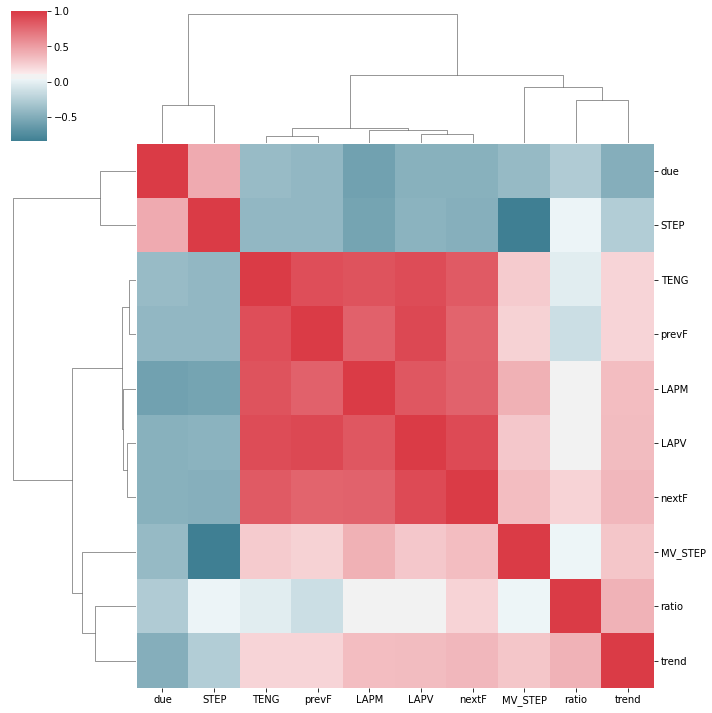

In [30]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.clustermap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap,figsize=(10, 10))

### Medidores de contraste en la imagen

In [4]:
#dataF = album['MLOG'].values
#dataF = album['TENG'].values
dataF = album['LAPV'].values

### Curvas con 20 puntos 

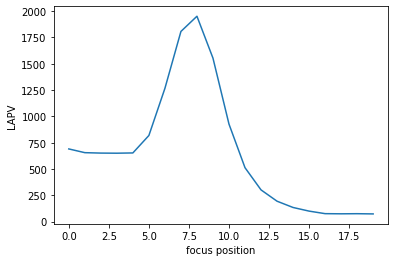

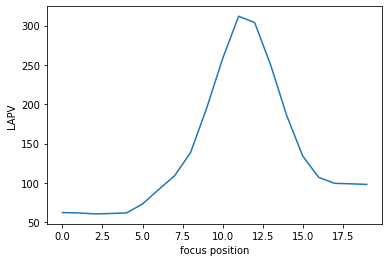

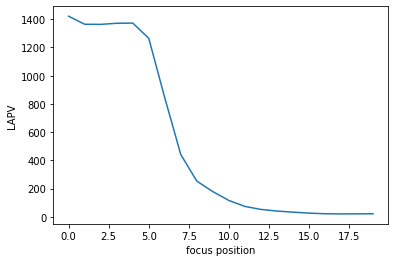

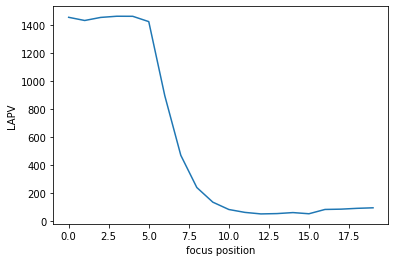

In [32]:
for i in range (100,180,20):
    plt.plot(dataF[i:(i+20)])
    plt.ylabel('LAPV')
    plt.xlabel('focus position')
    plt.show()

### Curvas con 10 puntos

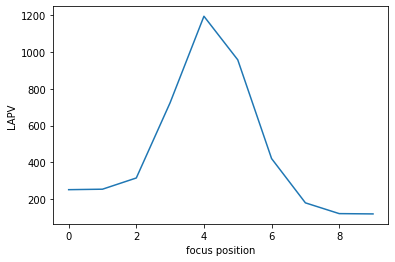

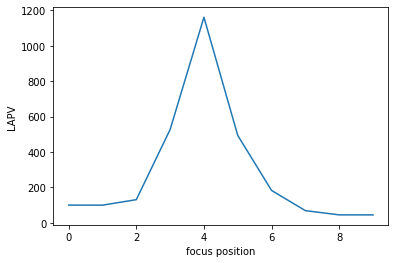

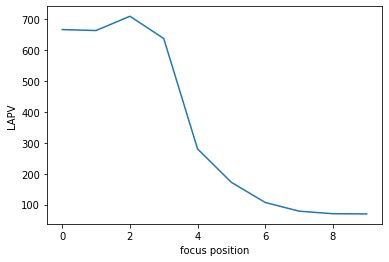

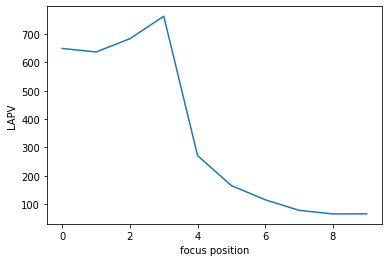

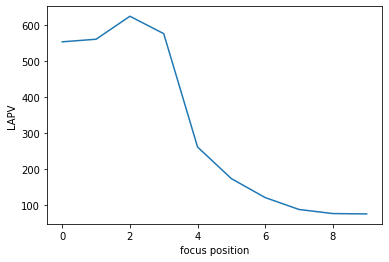

In [33]:
for i in range (0,50,10):
    plt.plot(dataF[i:(i+10)])
    plt.ylabel('LAPV')
    plt.xlabel('focus position')
    plt.show()

### Curvas con 50 puntos

In [19]:
dataF = album['LAPV'].values

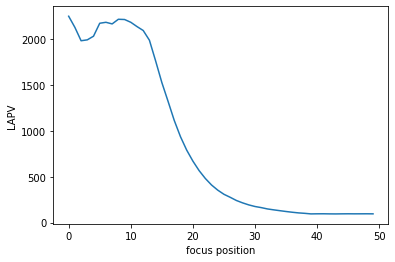

In [21]:
fig = plt.figure()

for i in range (0,50,50):
    plt.plot(dataF[i:(i+50)])
    plt.ylabel('LAPV')
    plt.xlabel('focus position')
    plt.show()
    
fig.savefig("LAPV_50.png")

In [24]:
dataF = album['TENG'].values

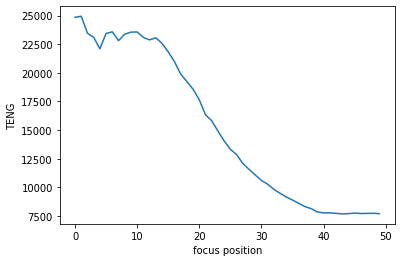

In [25]:
fig = plt.figure()

for i in range (0,50,50):
    plt.plot(dataF[i:(i+50)])
    plt.ylabel('TENG')
    plt.xlabel('focus position')
    plt.show()
    
fig.savefig("TENG_50.png")

In [26]:
dataF = album['S3'].values

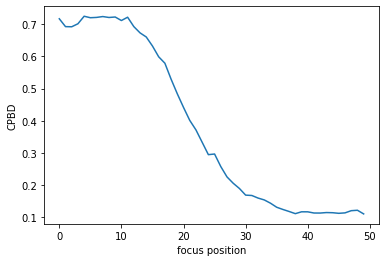

In [28]:
fig = plt.figure()

for i in range (0,50,50):
    plt.plot(dataF[i:(i+50)])
    plt.ylabel('CPBD')
    plt.xlabel('focus position')
    plt.show()

fig.savefig("CPBD_50.png")

### Predictions

In [34]:
feature_cols = ['LAPV','TENG','LAPM','prevF','nextF','ratio', 'trend']

X = album[feature_cols] # Features
y = album.due # Target 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [36]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [44]:
filename = 'modelo.sav'
pickle.dump(clf, open(filename, 'wb'))
print("SAVE MODEL")

SAVE MODEL


In [48]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [37]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [46]:
X_test.head()

LAPV         TENG     LAPM       prevF       nextF     ratio  trend
116    75.21821   7795.30346  2.19204    99.45470    73.82645  0.756306      0
112   301.10461  15072.08533  3.87781   512.07323   193.59292  0.588011      0
99     39.73120   5511.11986  1.73710    39.51135    39.73120  1.005564      0
161  1435.62007  18563.78315  6.57481  1458.41980  1457.63226  0.984367      1
35    165.70449  11225.26604  3.39392   271.43299   115.81215  0.610480      0

In [47]:
y_test.head()

116    1
112    1
99     1
161    0
35     0
Name: due, dtype: int64

In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['small', 'big'])
                #special_characters=True,feature_names = feature_cols,class_names=['1','2','3','4','5','6','7','8','9','10'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('album.png')

True

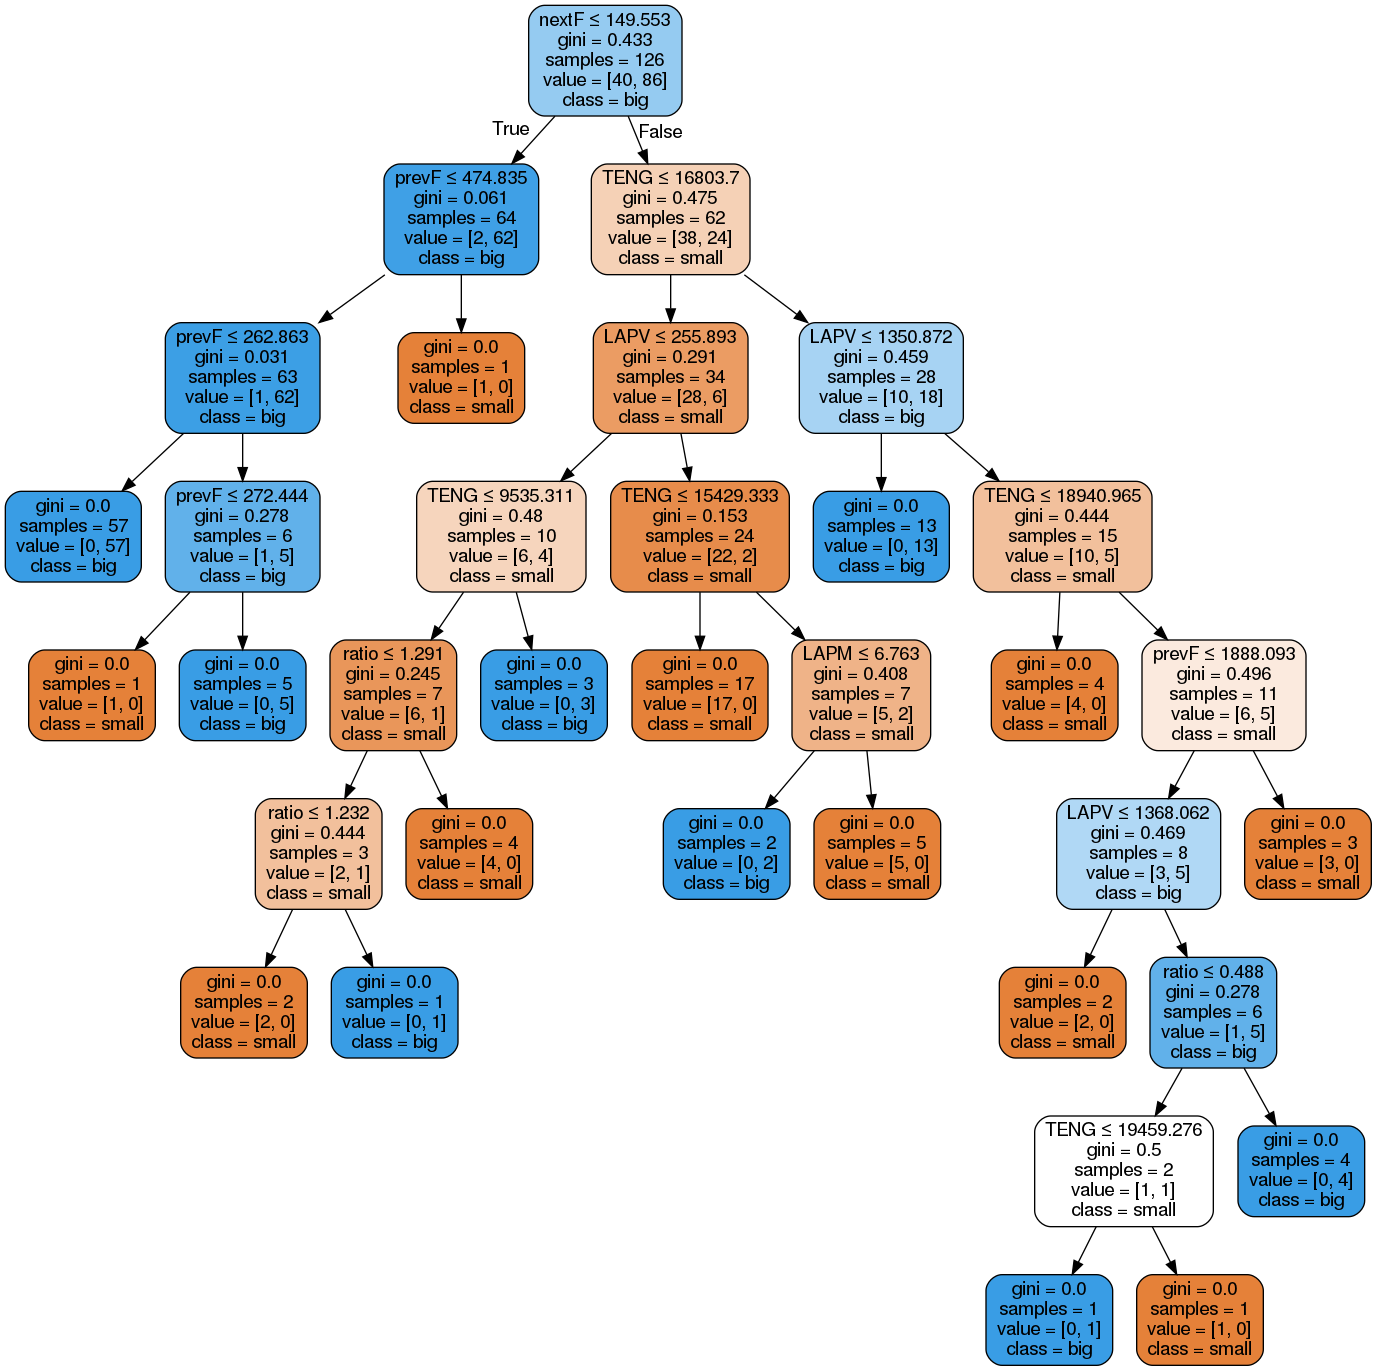

In [40]:
Image(graph.create_png())